In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot: xlabel='TV', ylabel='Sales'>

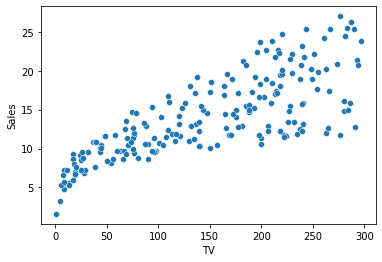

In [7]:
sns.scatterplot(df,x='TV',y='Sales')

<AxesSubplot: xlabel='Radio', ylabel='Sales'>

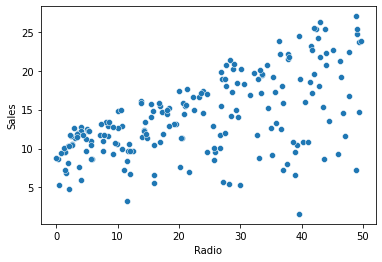

In [8]:
sns.scatterplot(df,x='Radio',y='Sales')

<AxesSubplot: xlabel='Newspaper', ylabel='Sales'>

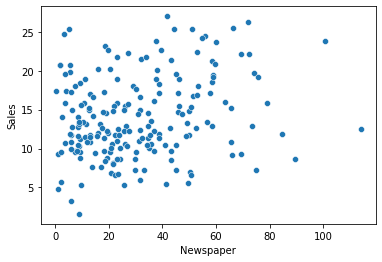

In [9]:
sns.scatterplot(df,x='Newspaper',y='Sales')

In [10]:
X = df.iloc[:,:3]
y = df.iloc[:,3:]

In [11]:
X


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [12]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2)
X_train

,TV,Radio,Newspaper
193,166.8,42.0,3.6
189,18.7,12.1,23.4
8,8.6,2.1,1.0
63,102.7,29.6,8.4
97,184.9,21.0,22.0
...,...,...,...
36,266.9,43.8,5.0
103,187.9,17.2,17.9
182,56.2,5.7,29.7
115,75.1,35.0,52.7


In [14]:
y_train

,Sales
193,19.6
189,6.7
8,4.8
63,14.0
97,15.5
...,...
36,25.4
103,14.7
182,8.7
115,12.6


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_test_scaled

array([[ 0.24905896, -0.92175426, -0.61991972],
       [ 1.09341633,  0.23872772, -0.91632252],
       [ 1.70845659,  1.22016391,  0.88903999],
       [-1.17270714,  0.12599519, -0.48519118],
       [-0.40714077, -0.63660726,  0.01330444],
       [-0.57295469, -1.49204826, -1.07799678],
       [ 0.91701855, -1.29973982,  0.82616667],
       [ 1.0005135 ,  0.55703135,  1.92195885],
       [ 1.16162347,  1.66446273,  0.57916434],
       [ 0.42780871, -0.86870366,  1.21238851],
       [ 1.72021644, -1.31300247, -1.02859631],
       [-0.43536442, -0.65650124, -0.92081348],
       [ 0.62537423, -1.35279043, -1.14536105],
       [-1.25149814,  1.0875374 , -0.87590396],
       [ 1.64495339, -0.88196631, -1.1229063 ],
       [ 1.596738  , -0.91512293, -0.44926356],
       [ 0.30315428, -1.06764342,  0.17048775],
       [ 1.25217433,  0.83554703,  1.83663077],
       [-1.46787942, -0.25199037, -0.64686543],
       [-1.37497659, -1.47878561, -0.48070023],
       [-1.65015712, -0.81565305, -1.154

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test_scaled)

In [21]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)*100
r2

90.59760897838196